# Relationships

Up until this point, you've only looked at one variable at a time. 
In this chapter, you'll explore relationships between variables two at a 
time, using scatter plots and other visualizations to extract insights 
from a new dataset obtained from the Behavioral Risk Factor Surveillance
Survey (BRFSS). You'll also learn how to quantify those relationships 
using __correlation and simple regression.__



### Scatter Plot

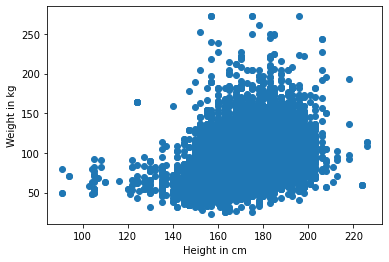

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

brfss = pd.read_hdf('./Data/brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Transparency

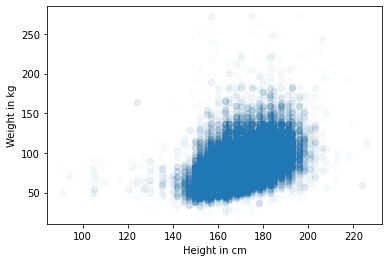

In [11]:
plt.plot(height, weight, 'o', alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Marker size

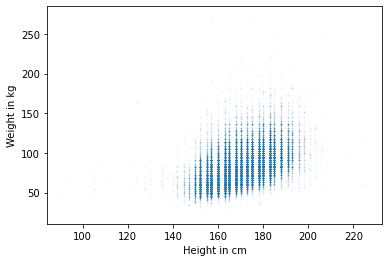

In [12]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Jittering

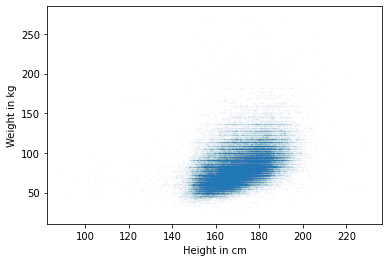

In [13]:
import numpy as np

height_jitter = height + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

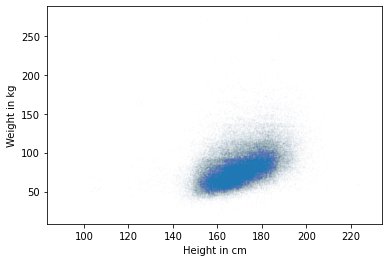

In [14]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Zoom

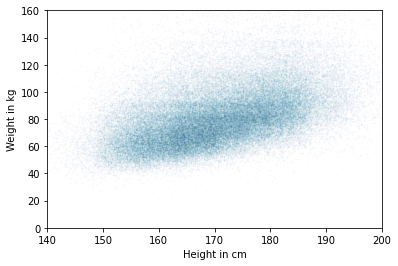

In [15]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## Visualizing Relationships

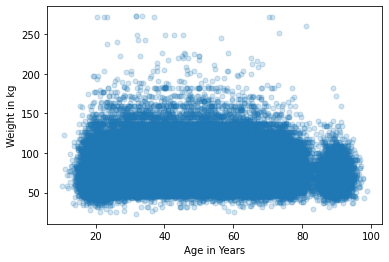

In [17]:
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
weight = brfss['WTKG3']
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)
plt.xlabel('Age in Years')
plt.ylabel('Weight in kg')
plt.show()

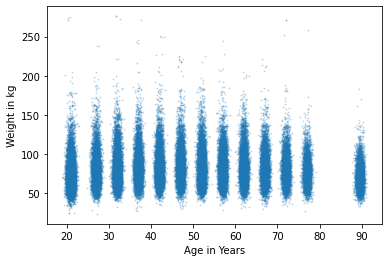

In [19]:
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.xlabel('Age in Years')
plt.ylabel('Weight in kg')
plt.show()

## Violin plot

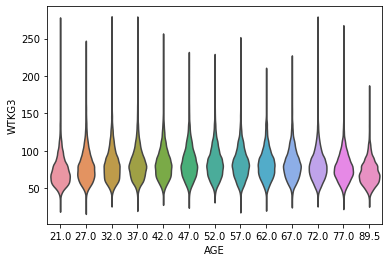

In [21]:
import seaborn as sns

data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

## Box plot

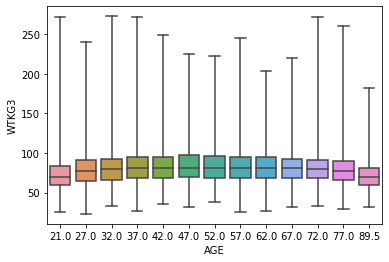

In [22]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

## Log scale

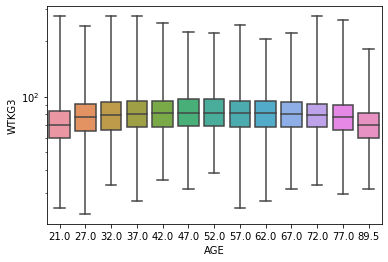

In [23]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

## Correlation

### Correlation coefficient

In [24]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


In [ ]:
"""

It is tempting to conclude that there is no relationship between age and 
weight, but we have already seen that there is. So why is the correlation 
so low?


"""

### Nonlinear relationships

In [27]:
xs = np.linspace(-1, 1)
ys = xs**2
ys += normal(0, 0.05, len(xs))
np.corrcoef(xs, ys)

NameError: name 'normal' is not defined

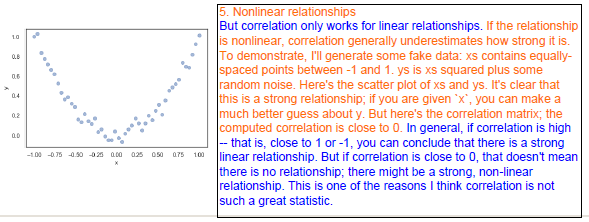

## Simple regression

In [39]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['AGE', 'WTKG3'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)

print(res)

LinregressResult(slope=0.023981159566968724, intercept=80.07977583683224, rvalue=0.021641432889064068, pvalue=4.3743274930075656e-11, stderr=0.003638139410742186, intercept_stderr=0.18688508176870167)


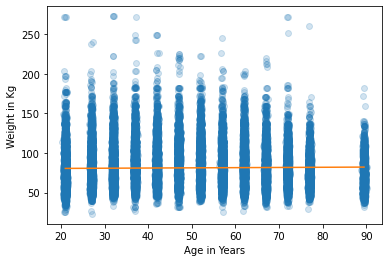

In [45]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)


fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-');

plt.xlabel('Age in Years')
plt.ylabel('Weight in Kg')
plt.show()

### Regression line

In [47]:
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)


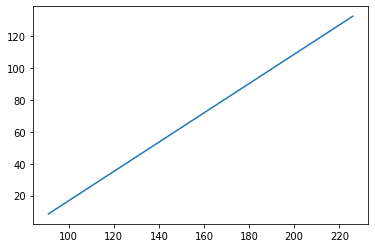

In [49]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-');

## Nonlinear relationships

In [50]:
subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.023981159566968724, intercept=80.07977583683224, rvalue=0.021641432889064068, pvalue=4.3743274930075656e-11, stderr=0.003638139410742186, intercept_stderr=0.18688508176870167)


In [ ]:
# Note: Upon plotting, A straight line does not capture the relationship 
# between these variables well.